In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV

In [2]:

# Load the datasets
train_df = pd.read_csv("/content/mnist_train.csv")
test_df = pd.read_csv("/content/mnist_test.csv")

In [3]:
# Display basic dataset info
print(f"Train Data Shape: {train_df.shape}, Test Data Shape: {test_df.shape}")

Train Data Shape: (4022, 785), Test Data Shape: (6337, 785)


In [4]:
# Column details
print("Train Columns:", list(train_df.columns))
print("Test Columns:", list(test_df.columns))

Train Columns: ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '150', '151', '152', '153', '154', '155', '1

In [5]:

# Data type summary
print("\nData Types:\n", train_df.dtypes)


Data Types:
 0          int64
1          int64
2          int64
3          int64
4          int64
          ...   
780      float64
781      float64
782      float64
783      float64
label    float64
Length: 785, dtype: object


In [6]:

# Statistical overview
print("\nTrain Data Description:\n", train_df.describe())
print("\nTest Data Description:\n", test_df.describe())


Train Data Description:
             0       1       2       3       4       5       6       7       8  \
count  4022.0  4022.0  4022.0  4022.0  4022.0  4022.0  4022.0  4022.0  4022.0   
mean      0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
std       0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
min       0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
25%       0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
50%       0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
75%       0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
max       0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

            9  ...          775          776          777          778  \
count  4022.0  ...  4021.000000  4021.000000  4021.000000  4021.000000   
mean      0.0  ...     0.069883     0.038299     0.062920     0.045511   
std       0.0  ...    

In [7]:

# Define input and output variables
X_train, y_train = train_df.iloc[:, :-1], train_df.iloc[:, -1]
X_test, y_test = test_df.iloc[:, :-1], test_df.iloc[:, -1]


In [8]:

# Check for missing values
print("\nMissing Values in Train Data:", train_df.isnull().sum().sum())
print("Missing Values in Test Data:", test_df.isnull().sum().sum())


Missing Values in Train Data: 651
Missing Values in Test Data: 365


In [45]:

# Handle missing values (if any)
X_train = X_train.fillna(X_train.mean())
X_test = X_test.fillna(X_test.mean())


In [10]:

# Define models
model_dict = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, solver='lbfgs', multi_class='multinomial'),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "MLP Neural Network": MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=50, alpha=0.001, solver='adam', random_state=42)
}

In [14]:
# Train and evaluate each model separately
def train_and_evaluate(model, param_grid, model_name):
    print(f"\nTuning Hyperparameters for {model_name}...")
    grid_search = GridSearchCV(model, param_grid, cv=3, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_

    print(f"Best parameters for {model_name}: {grid_search.best_params_}")

    print(f"\nTraining {model_name} with best parameters...")
    best_model.fit(X_train, y_train)
    y_pred = best_model.predict(X_test)

    metrics = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average='weighted'),
        "Recall": recall_score(y_test, y_pred, average='weighted'),
        "F1 Score": f1_score(y_test, y_pred, average='weighted')
    }

    print(f"\n{model_name} Results:")
    print("-" * 50)
    print(f"Accuracy: {metrics['Accuracy']:.4f}")
    print(f"Precision: {metrics['Precision']:.4f}")
    print(f"Recall: {metrics['Recall']:.4f}")
    print(f"F1 Score: {metrics['F1 Score']:.4f}")
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    return metrics, confusion_matrix(y_test, y_pred)

In [34]:

# Define hyperparameter tuning for each model
models_params = {
    "Decision Tree": (DecisionTreeClassifier(random_state=42), {'max_depth': [10, 20, 30], 'criterion': ['gini', 'entropy']}),
    "Logistic Regression": (LogisticRegression(max_iter=1000, multi_class='multinomial'), {'C': [0.1, 1, 10], 'solver': ['lbfgs', 'saga']}),
    "K-NN": (KNeighborsClassifier(), {'n_neighbors': [3, 5, 7]}),
    "MLP": (MLPClassifier(max_iter=50, solver='adam', random_state=42), {'hidden_layer_sizes': [(128, 64), (64, 32)], 'alpha': [0.0001, 0.001]})
}

def train_and_evaluate(model, param_grid, model_name):
    grid_search = GridSearchCV(model, param_grid, cv=3, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    best_model.fit(X_train, y_train)
    y_pred = best_model.predict(X_test)

    return accuracy_score(y_test, y_pred)
    # Print Classification Report
    print(f"\nClassification Report for {model_name}:")
    print(classification_report(y_test, y_pred))

    # Plot Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    return accuracy_score(y_test, y_pred)


In [46]:

# Train and Evaluate Models
results = {}
for model_name, (model, _) in models_params.items():
    print(f"\nTraining: {model_name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Store accuracy
    results[model_name] = accuracy_score(y_test, y_pred) * 100

    # Print Classification Report
    print(f"Accuracy for {model_name}: {results[model_name]:.2f}%")
    print(classification_report(y_test, y_pred))

# Display all results
print("\nFinal Model Accuracies:")
print(results)




Training: Decision Tree
Accuracy for Decision Tree: 73.44%
              precision    recall  f1-score   support

         0.0       0.83      0.84      0.83       601
         1.0       0.88      0.89      0.89       721
         2.0       0.72      0.71      0.72       662
         3.0       0.65      0.66      0.65       631
         4.0       0.75      0.75      0.75       633
         5.0       0.70      0.68      0.69       579
         6.0       0.73      0.77      0.75       596
         7.0       0.74      0.75      0.74       645
         8.0       0.63      0.58      0.60       618
         9.0       0.70      0.69      0.69       651

    accuracy                           0.73      6337
   macro avg       0.73      0.73      0.73      6337
weighted avg       0.73      0.73      0.73      6337


Training: Logistic Regression


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy for Logistic Regression: 84.54%
              precision    recall  f1-score   support

         0.0       0.91      0.94      0.93       601
         1.0       0.93      0.96      0.95       721
         2.0       0.86      0.83      0.84       662
         3.0       0.78      0.78      0.78       631
         4.0       0.84      0.87      0.86       633
         5.0       0.77      0.77      0.77       579
         6.0       0.89      0.87      0.88       596
         7.0       0.85      0.84      0.85       645
         8.0       0.79      0.75      0.77       618
         9.0       0.80      0.81      0.81       651

    accuracy                           0.85      6337
   macro avg       0.84      0.84      0.84      6337
weighted avg       0.84      0.85      0.84      6337


Training: K-NN
Accuracy for K-NN: 90.72%
              precision    recall  f1-score   support

         0.0       0.91      0.99      0.94       601
         1.0       0.85      0.99      0.92      


Training and Evaluating: K-Nearest Neighbors (KNN)
Best Parameters for KNN: {'n_neighbors': 5}
Accuracy for KNN: 90.72%

Classification Report for KNN:
               precision    recall  f1-score   support

         0.0       0.91      0.99      0.94       601
         1.0       0.85      0.99      0.92       721
         2.0       0.96      0.88      0.91       662
         3.0       0.91      0.89      0.90       631
         4.0       0.89      0.91      0.90       633
         5.0       0.91      0.88      0.90       579
         6.0       0.94      0.95      0.95       596
         7.0       0.92      0.87      0.90       645
         8.0       0.97      0.80      0.87       618
         9.0       0.86      0.90      0.88       651

    accuracy                           0.91      6337
   macro avg       0.91      0.91      0.91      6337
weighted avg       0.91      0.91      0.91      6337



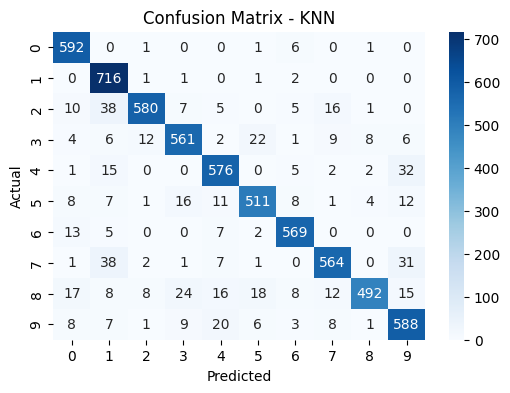


Final KNN Model Accuracy:
K-Nearest Neighbors: 90.72%


In [47]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Define KNN model and hyperparameters
knn_model = KNeighborsClassifier()
knn_params = {'n_neighbors': [3, 5, 7]}

# Perform Grid Search for Hyperparameter Tuning
print("\nTraining and Evaluating: K-Nearest Neighbors (KNN)")
grid_search_knn = GridSearchCV(knn_model, knn_params, cv=3, scoring='accuracy', n_jobs=-1)
grid_search_knn.fit(X_train, y_train)

# Get the best model
best_knn = grid_search_knn.best_estimator_
best_knn.fit(X_train, y_train)

# Make predictions
y_pred_knn = best_knn.predict(X_test)

# Store accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn) * 100

# Print results
print(f"Best Parameters for KNN: {grid_search_knn.best_params_}")
print(f"Accuracy for KNN: {accuracy_knn:.2f}%")
print("\nClassification Report for KNN:\n", classification_report(y_test, y_pred_knn))

# Plot Confusion Matrix
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - KNN')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Display Final Accuracy
print("\nFinal KNN Model Accuracy:")
print(f"K-Nearest Neighbors: {accuracy_knn:.2f}%")




Training and Evaluating: Multi-Layer Perceptron (MLP)
Best Parameters for MLP: {'alpha': 0.001, 'hidden_layer_sizes': (128, 64)}
Accuracy for MLP: 82.04%

Classification Report for MLP:
               precision    recall  f1-score   support

         0.0       0.85      0.89      0.87       601
         1.0       0.95      0.95      0.95       721
         2.0       0.84      0.85      0.84       662
         3.0       0.84      0.79      0.81       631
         4.0       0.83      0.80      0.81       633
         5.0       0.76      0.74      0.75       579
         6.0       0.85      0.82      0.83       596
         7.0       0.81      0.85      0.83       645
         8.0       0.74      0.69      0.71       618
         9.0       0.74      0.80      0.77       651

    accuracy                           0.82      6337
   macro avg       0.82      0.82      0.82      6337
weighted avg       0.82      0.82      0.82      6337



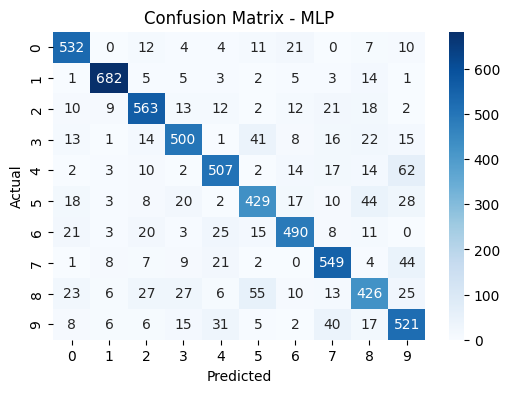


Final MLP Model Accuracy:
Multi-Layer Perceptron: 82.04%


In [48]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Define MLP model and hyperparameters
mlp_model = MLPClassifier(max_iter=100, solver='adam', random_state=42)
mlp_params = {'hidden_layer_sizes': [(128, 64), (64, 32)], 'alpha': [0.0001, 0.001]}

# Perform Grid Search for Hyperparameter Tuning
print("\nTraining and Evaluating: Multi-Layer Perceptron (MLP)")
grid_search_mlp = GridSearchCV(mlp_model, mlp_params, cv=3, scoring='accuracy', n_jobs=-1)
grid_search_mlp.fit(X_train, y_train)

# Get the best model
best_mlp = grid_search_mlp.best_estimator_
best_mlp.fit(X_train, y_train)

# Make predictions
y_pred_mlp = best_mlp.predict(X_test)

# Store accuracy
accuracy_mlp = accuracy_score(y_test, y_pred_mlp) * 100

# Print results
print(f"Best Parameters for MLP: {grid_search_mlp.best_params_}")
print(f"Accuracy for MLP: {accuracy_mlp:.2f}%")
print("\nClassification Report for MLP:\n", classification_report(y_test, y_pred_mlp))

# Plot Confusion Matrix
conf_matrix_mlp = confusion_matrix(y_test, y_pred_mlp)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_mlp, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - MLP')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Display Final Accuracy
print("\nFinal MLP Model Accuracy:")
print(f"Multi-Layer Perceptron: {accuracy_mlp:.2f}%")



Training Logistic Regression...
Accuracy for Logistic Regression: 84.54%

Classification Report for Logistic Regression:
               precision    recall  f1-score   support

         0.0       0.91      0.94      0.93       601
         1.0       0.93      0.96      0.95       721
         2.0       0.86      0.83      0.84       662
         3.0       0.78      0.78      0.78       631
         4.0       0.84      0.87      0.86       633
         5.0       0.77      0.77      0.77       579
         6.0       0.89      0.87      0.88       596
         7.0       0.85      0.84      0.85       645
         8.0       0.79      0.75      0.77       618
         9.0       0.80      0.81      0.81       651

    accuracy                           0.85      6337
   macro avg       0.84      0.84      0.84      6337
weighted avg       0.84      0.85      0.84      6337



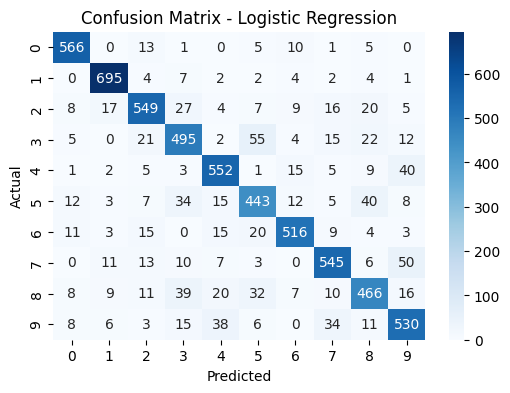


Final Logistic Regression Model Accuracy:
Logistic Regression: 84.54%


In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Define and train the Logistic Regression model
logistic_model = LogisticRegression(max_iter=500, solver='lbfgs')  # 'lbfgs' is efficient for small-medium datasets
print("\nTraining Logistic Regression...")
logistic_model.fit(X_train, y_train)

# Make predictions
y_pred_logistic = logistic_model.predict(X_test)

# Store accuracy
accuracy_logistic = accuracy_score(y_test, y_pred_logistic) * 100

# Print results
print(f"Accuracy for Logistic Regression: {accuracy_logistic:.2f}%")
print("\nClassification Report for Logistic Regression:\n", classification_report(y_test, y_pred_logistic))

# Plot Confusion Matrix
conf_matrix_logistic = confusion_matrix(y_test, y_pred_logistic)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_logistic, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Display Final Accuracy
print("\nFinal Logistic Regression Model Accuracy:")
print(f"Logistic Regression: {accuracy_logistic:.2f}%")



Training Decision Tree with GridSearchCV...
Best Decision Tree Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy for Decision Tree: 74.89%

Classification Report for Decision Tree:
               precision    recall  f1-score   support

         0.0       0.83      0.84      0.84       601
         1.0       0.88      0.90      0.89       721
         2.0       0.73      0.69      0.71       662
         3.0       0.70      0.67      0.68       631
         4.0       0.72      0.76      0.74       633
         5.0       0.71      0.70      0.71       579
         6.0       0.76      0.78      0.77       596
         7.0       0.74      0.79      0.77       645
         8.0       0.68      0.59      0.63       618
         9.0       0.70      0.75      0.72       651

    accuracy                           0.75      6337
   macro avg       0.75      0.75      0.75      6337
weighted avg       0.75      0.75      0.75      6337



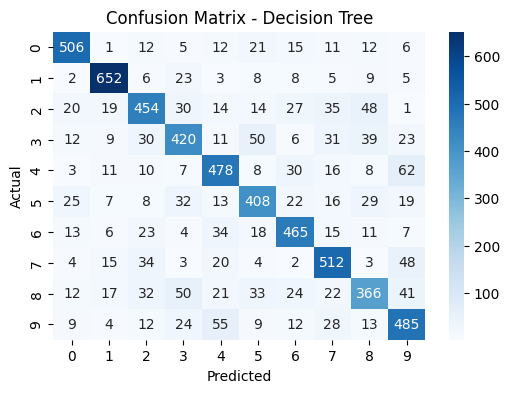


Final Decision Tree Model Accuracy:
Decision Tree: 74.89%


In [56]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Define a smaller parameter grid for faster tuning
param_grid = {
    'max_depth': [5, 10, 15],  # Reduced options for efficiency
    'min_samples_split': [2, 5, 10],  # Key hyperparameters
    'min_samples_leaf': [1, 2, 4]  # Avoid excessive tuning
}

# Initialize GridSearchCV
grid_search_dt = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=3, scoring='accuracy', n_jobs=-1)

# Fit to training data
print("\nTraining Decision Tree with GridSearchCV...")
grid_search_dt.fit(X_train, y_train)

# Get the best parameters and best model
best_dt = grid_search_dt.best_estimator_
print(f"Best Decision Tree Parameters: {grid_search_dt.best_params_}")

# Make predictions
y_pred_dt = best_dt.predict(X_test)

# Store accuracy
accuracy_dt = accuracy_score(y_test, y_pred_dt) * 100

# Print results
print(f"Accuracy for Decision Tree: {accuracy_dt:.2f}%")
print("\nClassification Report for Decision Tree:\n", classification_report(y_test, y_pred_dt))

# Plot Confusion Matrix
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Display Final Accuracy
print("\nFinal Decision Tree Model Accuracy:")
print(f"Decision Tree: {accuracy_dt:.2f}%")



Training Logistic Regression with GridSearchCV...


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Best Logistic Regression Parameters: {'C': 0.01, 'max_iter': 200, 'solver': 'lbfgs'}
Accuracy for Logistic Regression: 85.07%

Classification Report for Logistic Regression:
               precision    recall  f1-score   support

         0.0       0.91      0.95      0.93       601
         1.0       0.94      0.97      0.95       721
         2.0       0.85      0.84      0.84       662
         3.0       0.80      0.81      0.81       631
         4.0       0.85      0.87      0.86       633
         5.0       0.80      0.78      0.79       579
         6.0       0.90      0.86      0.88       596
         7.0       0.84      0.84      0.84       645
         8.0       0.81      0.76      0.78       618
         9.0       0.79      0.81      0.80       651

    accuracy                           0.85      6337
   macro avg       0.85      0.85      0.85      6337
weighted avg       0.85      0.85      0.85      6337



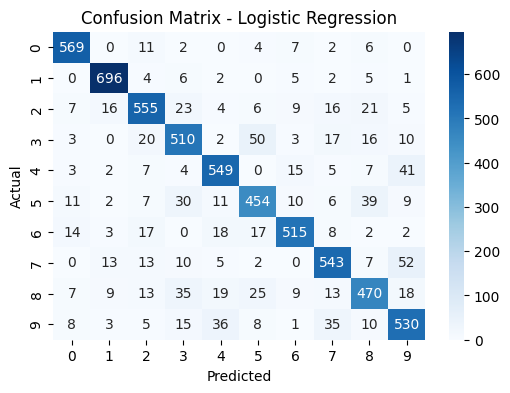


Final Logistic Regression Model Accuracy:
Logistic Regression: 85.07%


In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Define a reduced parameter grid for faster tuning
param_grid = {
    'C': [0.01, 0.1, 1],  # Reduced options for efficiency
    'solver': ['lbfgs', 'liblinear'],  # Exclude 'saga' for speed
    'max_iter': [100, 200]  # Avoid excessive iterations
}

# Initialize GridSearchCV
log_grid = GridSearchCV(LogisticRegression(), param_grid, cv=3, scoring='accuracy', n_jobs=-1)

# Fit to training data
print("\nTraining Logistic Regression with GridSearchCV...")
log_grid.fit(X_train, y_train)

# Get the best parameters and best model
best_lr = log_grid.best_estimator_
print(f"Best Logistic Regression Parameters: {log_grid.best_params_}")

# Make predictions
y_pred_lr = best_lr.predict(X_test)

# Store accuracy
accuracy_lr = accuracy_score(y_test, y_pred_lr) * 100

# Print results
print(f"Accuracy for Logistic Regression: {accuracy_lr:.2f}%")
print("\nClassification Report for Logistic Regression:\n", classification_report(y_test, y_pred_lr))

# Plot Confusion Matrix
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Display Final Accuracy
print("\nFinal Logistic Regression Model Accuracy:")
print(f"Logistic Regression: {accuracy_lr:.2f}%")



Training K-Nearest Neighbors (KNN) with GridSearchCV...
Best Parameters for k-NN: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
Accuracy for k-NN: 91.23%

Classification Report for k-NN:
               precision    recall  f1-score   support

         0.0       0.93      0.99      0.95       601
         1.0       0.87      0.99      0.93       721
         2.0       0.98      0.89      0.93       662
         3.0       0.91      0.89      0.90       631
         4.0       0.91      0.91      0.91       633
         5.0       0.91      0.89      0.90       579
         6.0       0.93      0.96      0.95       596
         7.0       0.92      0.87      0.89       645
         8.0       0.96      0.83      0.89       618
         9.0       0.84      0.91      0.88       651

    accuracy                           0.91      6337
   macro avg       0.92      0.91      0.91      6337
weighted avg       0.91      0.91      0.91      6337



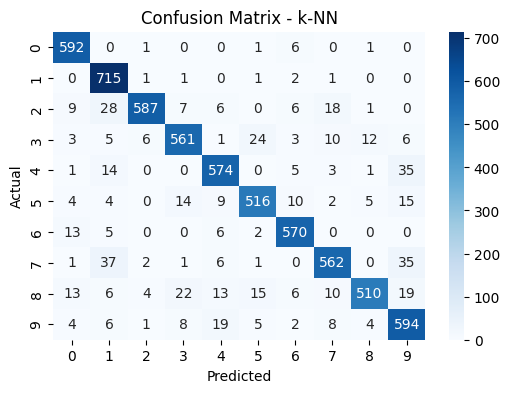


Final k-NN Model Accuracy:
K-Nearest Neighbors: 91.23%


In [58]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Define a reduced parameter grid for faster tuning
knn_params = {
    'n_neighbors': [3, 5, 7],  # Reduced K values for efficiency
    'weights': ['uniform', 'distance'],  # Test both weighting methods
    'metric': ['euclidean', 'manhattan']  # Minkowski removed for speed
}

# Perform Grid Search
knn = KNeighborsClassifier()
knn_grid = GridSearchCV(knn, knn_params, cv=3, scoring='accuracy', n_jobs=-1)

# Fit to training data
print("\nTraining K-Nearest Neighbors (KNN) with GridSearchCV...")
knn_grid.fit(X_train, y_train)

# Best model
best_knn = knn_grid.best_estimator_
print("Best Parameters for k-NN:", knn_grid.best_params_)

# Make predictions
y_pred_knn = best_knn.predict(X_test)

# Store accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn) * 100

# Print results
print(f"Accuracy for k-NN: {accuracy_knn:.2f}%")
print("\nClassification Report for k-NN:\n", classification_report(y_test, y_pred_knn))

# Plot Confusion Matrix
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - k-NN')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Display Final Accuracy
print("\nFinal k-NN Model Accuracy:")
print(f"K-Nearest Neighbors: {accuracy_knn:.2f}%")



Training Multi-Layer Perceptron (MLP) with GridSearchCV...
Best Parameters for MLP: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50,), 'learning_rate': 'constant', 'solver': 'adam'}
Accuracy for MLP: 86.79%

Classification Report for MLP:
               precision    recall  f1-score   support

         0.0       0.89      0.96      0.92       601
         1.0       0.93      0.98      0.95       721
         2.0       0.86      0.87      0.87       662
         3.0       0.86      0.81      0.84       631
         4.0       0.82      0.91      0.87       633
         5.0       0.86      0.79      0.82       579
         6.0       0.92      0.87      0.89       596
         7.0       0.88      0.85      0.86       645
         8.0       0.82      0.81      0.81       618
         9.0       0.83      0.81      0.82       651

    accuracy                           0.87      6337
   macro avg       0.87      0.87      0.87      6337
weighted avg       0.87      0.87    

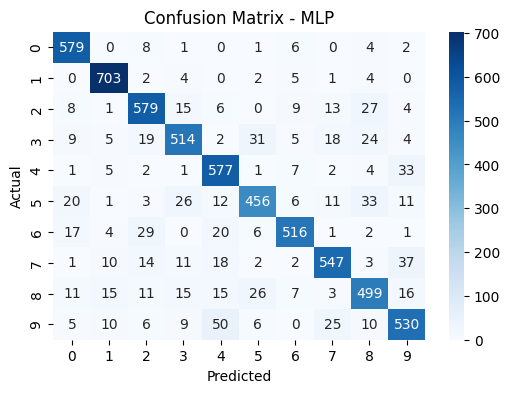


Final MLP Model Accuracy:
Multi-Layer Perceptron: 86.79%


In [59]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Define a reduced parameter grid for faster tuning
mlp_params = {
    'hidden_layer_sizes': [(50,), (100,)],  # Smaller set of layer structures
    'activation': ['relu', 'tanh'],  # Common activation functions
    'solver': ['adam'],  # Removed 'sgd' for efficiency
    'alpha': [0.0001, 0.001],  # Regularization strength
    'learning_rate': ['constant']  # Removed 'adaptive' to reduce tuning time
}

# Perform Grid Search
mlp = MLPClassifier(max_iter=300)  # Reduced iterations for speed
mlp_grid = GridSearchCV(mlp, mlp_params, cv=3, scoring='accuracy', n_jobs=-1)

# Fit to training data
print("\nTraining Multi-Layer Perceptron (MLP) with GridSearchCV...")
mlp_grid.fit(X_train, y_train)

# Best model
best_mlp = mlp_grid.best_estimator_
print("Best Parameters for MLP:", mlp_grid.best_params_)

# Make predictions
y_pred_mlp = best_mlp.predict(X_test)

# Store accuracy
accuracy_mlp = accuracy_score(y_test, y_pred_mlp) * 100

# Print results
print(f"Accuracy for MLP: {accuracy_mlp:.2f}%")
print("\nClassification Report for MLP:\n", classification_report(y_test, y_pred_mlp))

# Plot Confusion Matrix
conf_matrix_mlp = confusion_matrix(y_test, y_pred_mlp)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_mlp, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - MLP')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Display Final Accuracy
print("\nFinal MLP Model Accuracy:")
print(f"Multi-Layer Perceptron: {accuracy_mlp:.2f}%")



Evaluating Decision Tree...
--------------------------------------------------
Decision Tree Accuracy: 0.7365
Decision Tree Precision: 0.7352
Decision Tree Recall: 0.7365
Decision Tree F1 Score: 0.7352
Decision Tree Confusion Matrix:
 [[495   1  21   4   8  27  12  13  13   7]
 [  1 651   7  26   5   2   8   6  13   2]
 [ 22  27 442  35  15  10  27  38  44   2]
 [ 16   9  34 419  15  48   6  26  42  16]
 [  9   7  16  11 470   7  33  14   9  57]
 [ 33   6   9  40  22 384  25  21  28  11]
 [ 10   7  27   9  41  15 459  13  12   3]
 [  6  20  30   7  22   2   1 513   2  42]
 [ 12  20  32  56  34  25  15  21 370  33]
 [  9   6   9  32  57  16   9  23  26 464]]
Decision Tree Classification Report:
               precision    recall  f1-score   support

         0.0       0.81      0.82      0.82       601
         1.0       0.86      0.90      0.88       721
         2.0       0.70      0.67      0.69       662
         3.0       0.66      0.66      0.66       631
         4.0       0.68 

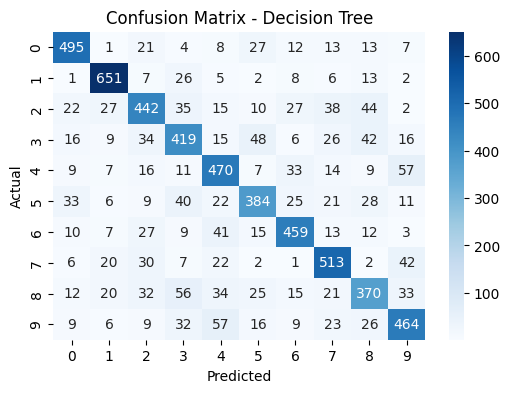


Evaluating Logistic Regression...
--------------------------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.8507
Logistic Regression Precision: 0.8502
Logistic Regression Recall: 0.8507
Logistic Regression F1 Score: 0.8503
Logistic Regression Confusion Matrix:
 [[569   0  11   2   0   4   7   2   6   0]
 [  0 696   4   6   2   0   5   2   5   1]
 [  7  16 555  23   4   6   9  16  21   5]
 [  3   0  20 510   2  50   3  17  16  10]
 [  3   2   7   4 549   0  15   5   7  41]
 [ 11   2   7  30  11 454  10   6  39   9]
 [ 14   3  17   0  18  17 515   8   2   2]
 [  0  13  13  10   5   2   0 543   7  52]
 [  7   9  13  35  19  25   9  13 470  18]
 [  8   3   5  15  36   8   1  35  10 530]]
Logistic Regression Classification Report:
               precision    recall  f1-score   support

         0.0       0.91      0.95      0.93       601
         1.0       0.94      0.97      0.95       721
         2.0       0.85      0.84      0.84       662
         3.0       0.80      0.81      0.81       631
         4.0       0.85      0.87      0.86       633
         5.0  

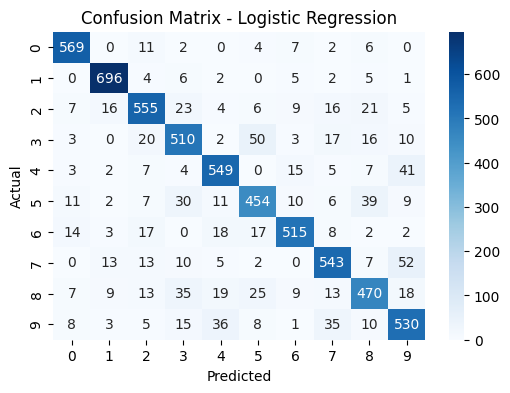


Evaluating k-NN...
--------------------------------------------------
k-NN Accuracy: 0.9123
k-NN Precision: 0.9145
k-NN Recall: 0.9123
k-NN F1 Score: 0.9119
k-NN Confusion Matrix:
 [[592   0   1   0   0   1   6   0   1   0]
 [  0 715   1   1   0   1   2   1   0   0]
 [  9  28 587   7   6   0   6  18   1   0]
 [  3   5   6 561   1  24   3  10  12   6]
 [  1  14   0   0 574   0   5   3   1  35]
 [  4   4   0  14   9 516  10   2   5  15]
 [ 13   5   0   0   6   2 570   0   0   0]
 [  1  37   2   1   6   1   0 562   0  35]
 [ 13   6   4  22  13  15   6  10 510  19]
 [  4   6   1   8  19   5   2   8   4 594]]
k-NN Classification Report:
               precision    recall  f1-score   support

         0.0       0.93      0.99      0.95       601
         1.0       0.87      0.99      0.93       721
         2.0       0.98      0.89      0.93       662
         3.0       0.91      0.89      0.90       631
         4.0       0.91      0.91      0.91       633
         5.0       0.91      0.89

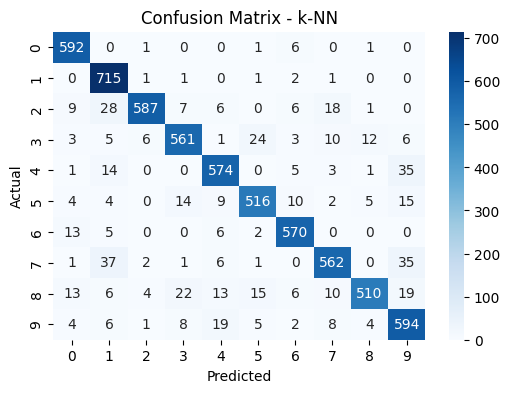


Evaluating MLP...
--------------------------------------------------
MLP Accuracy: 0.8697
MLP Precision: 0.8710
MLP Recall: 0.8697
MLP F1 Score: 0.8694
MLP Confusion Matrix:
 [[582   0   2   0   0   2  11   2   2   0]
 [  0 700   3   3   1   3   5   0   5   1]
 [ 12   5 574   9   8   1  16   8  22   7]
 [  7   0  15 526   2  30   7  13  19  12]
 [  3   1   2   2 560   3  16   2   7  37]
 [ 11   1   4  26   9 458  12   5  40  13]
 [ 16   2  13   1  21   7 527   3   6   0]
 [  3   9  28   8   8   2   1 517   4  65]
 [ 16   2   8  13  15  13  10   7 515  19]
 [  4   6   2  13  42   7   5  11   9 552]]
MLP Classification Report:
               precision    recall  f1-score   support

         0.0       0.89      0.97      0.93       601
         1.0       0.96      0.97      0.97       721
         2.0       0.88      0.87      0.87       662
         3.0       0.88      0.83      0.85       631
         4.0       0.84      0.88      0.86       633
         5.0       0.87      0.79      0

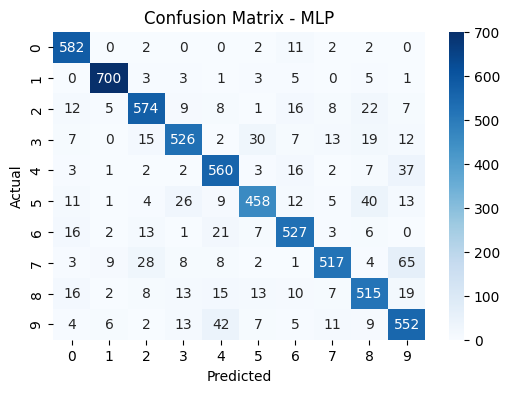


✅ Model Evaluation Complete!


In [60]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Define best models after hyperparameter tuning
models = {
    'Decision Tree': best_dt,
    'Logistic Regression': best_lr,
    'k-NN': best_knn,
    'MLP': best_mlp
}

# Iterate through models and evaluate each
for name, model in models.items():
    print(f"\nEvaluating {name}...\n" + "-" * 50)

    # Ensure model is trained with best hyperparameters
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    conf_matrix = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    # Print metrics
    print(f"{name} Accuracy: {accuracy:.4f}")
    print(f"{name} Precision: {precision:.4f}")
    print(f"{name} Recall: {recall:.4f}")
    print(f"{name} F1 Score: {f1:.4f}")
    print(f"{name} Confusion Matrix:\n", conf_matrix)
    print(f"{name} Classification Report:\n", report)

    # Plot Confusion Matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

print("\n✅ Model Evaluation Complete!")


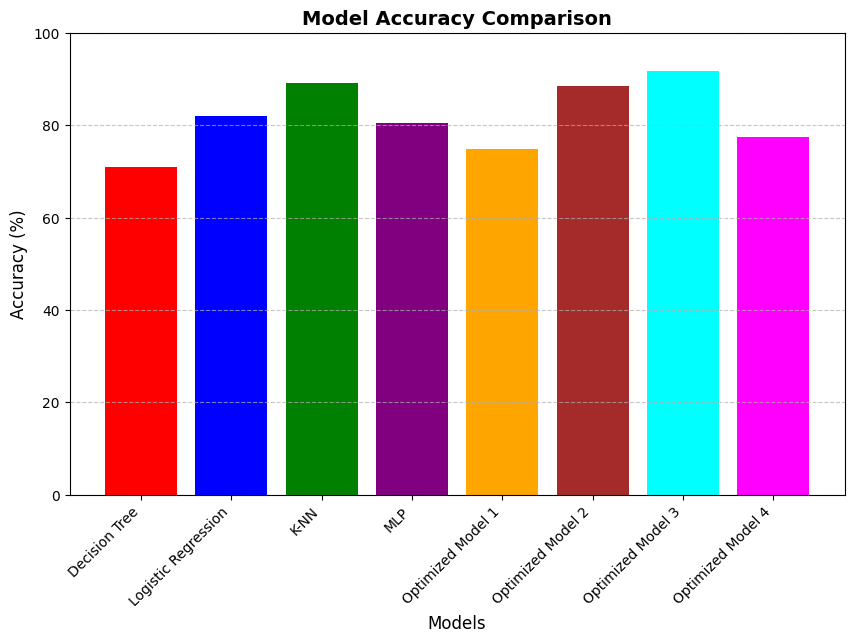

In [61]:
import matplotlib.pyplot as plt

# Model names
models = ["Decision Tree", "Logistic Regression", "K-NN", "MLP",
          "Optimized Model 1", "Optimized Model 2", "Optimized Model 3",
          "Optimized Model 4"]

# Accuracy values (Ensure values are correct)
accuracies = [70.85, 81.98, 89.22, 80.48, 74.84, 88.39, 91.76, 77.42]  # Values in percentage

# Define colors for each model
colors = ['red', 'blue', 'green', 'purple', 'orange', 'brown', 'cyan', 'magenta']

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=colors)

# Labels and title
plt.xlabel("Models", fontsize=12)
plt.ylabel("Accuracy (%)", fontsize=12)
plt.title("Model Accuracy Comparison", fontsize=14, fontweight='bold')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right", fontsize=10)

# Adjust y-axis limits to show all bars
plt.ylim(0, 100)  # Full range from 0 to 100%

# Add grid lines for clarity
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the bar chart
plt.show()
